In [32]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df_matches = pd.read_csv("matches.csv")
df_matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [33]:
df_deliveries = pd.read_csv("deliveries.csv")
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [34]:
print(df_matches.shape)
print(df_deliveries.shape)

(756, 18)
(179078, 21)


In matches data frame columns like umpire1,umpire2,umpire3 are not useful because these days they are using technology. So we cant decide which umpire is more useful for predicting anything related to match.

Date is also not useful because we already have season column which is also almost equal to date.

City and venue also not important features for this year IPL. Because IPL2020 is happening in UAE, only 2014 ipl was happened in UAE that to half season. But i am removing only venue it almost equal to city feature.

'Result' feature is almost equal to 'winner' feature. So i am dropping result column also.

In [35]:
df_matches = df_matches.drop(['venue','date','result','umpire1','umpire2','umpire3'], axis = 1) 
df_matches.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant,0,7,SPD Smith


In [36]:
print(df_matches["team1"].value_counts())

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64


In [37]:
#In 2019 delhi daredevils name changed to delhi capitals. So i am replacing old name with new name for all the rows.
df_matches = df_matches.replace(to_replace ="Delhi Daredevils", value = "Delhi Capitals") 

df_deliveries = df_deliveries.replace(to_replace = "Delhi Daredevils", value = "Delhi Capitals")

#Rising pune supergiants name also printed in two ways. Lets change it to Rising pune supergiants.
df_matches = df_matches.replace(to_replace ="Rising Pune Supergiant", value = "Rising Pune Supergiants") 

df_deliveries = df_deliveries.replace(to_replace = "Rising Pune Supergiant", value = "Rising Pune Supergiants")

In [38]:
#checking null values in matches dataset
print(df_matches.isnull().sum())

id                 0
season             0
city               7
team1              0
team2              0
toss_winner        0
toss_decision      0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
dtype: int64


In [39]:
#printing null rows in matches dataset
df1_null = df_matches[df_matches.isna().any(axis=1)]
df1_null.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
300,301,2011,Delhi,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,0,NaN,0,0,NaN
461,462,2014,NaN,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Royal Challengers Bangalore,0,7,PA Patel


In [40]:
#After seeing above table we can clearly understood that 4 matches are not played beacuse of rain, badlight or pitch condition. 
#So i am replacing those null values in winner column with no result and palyer of the match column null values with not declared.
df_matches["winner"].fillna("No result", inplace = True)
df_matches['player_of_match'].fillna("Not declared", inplace = True)
#city column also has 7 null values. I checked those matches data in Espn website and they played in Dubai.
df_matches["city"].fillna("Dubai", inplace = True)
print(df_matches.shape)

(756, 12)


In [41]:
#checking null values in deliveries dataset
print(df_deliveries.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64


Player_dismissed, dismissal_kind and fielder features are having null values. But if you consider today questions only 'player_dismissed' and 'dismissal_kind' features are useful for today analysis. So i am removing "fielder" feature.

Filling player_dismissed null values with 'No wicket', dismissal_Kind null values with also No Wicket.

In [42]:
#dropping fielder column
df_deliveries = df_deliveries.drop(['fielder'], axis = 1) 
#filling null values
df_deliveries["player_dismissed"].fillna("No Wicket", inplace = True)
df_deliveries["dismissal_kind"].fillna("No Wicket", inplace = True)
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket


In [43]:
# list of dtypes to include 
include =['float', 'int']
desc = df_deliveries.describe(include = include)
desc

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


I think there are no outliers present in overs column but in balls column balls range is between(0-9), it happens if bowlers balls extra deliveries.

In innings column maximum value is 5 so there are some outliers presented. Because there are 2 innings per match, if match tied then they will conduct one super over till last season. So maximum number of innings is 4.

And in remaining columns max value is in certain limit only. So i can say there are not much outliers.

### Q1) Who will win final match DC vs MI?

In [44]:
#First Lets see head-head results
df_DC_MI = df_matches[((df_matches['team1'] == 'Delhi Capitals') | (df_matches['team1'] == 'Mumbai Indians')) & 
                        ((df_matches['team2'] == 'Delhi Capitals') | (df_matches['team2'] == 'Mumbai Indians'))] 

#plotting DC and MI wins against each other
import plotly.graph_objs as go
df_winner = df_DC_MI[['id','winner']].groupby('winner').size().reset_index()
df_winner.columns = ['winner','total_wins']
df_winner = df_winner.sort_values('total_wins',ascending=False)[:2]

data = go.Bar(x = df_winner['winner'],y = df_winner['total_wins'])
layout = go.Layout(title = 'Number of wins by DC and MI against each other',xaxis = dict(title = 'Team'),yaxis = dict(title = 'No of wins'))
fig = go.Figure(data = data,layout = layout)
fig.show()

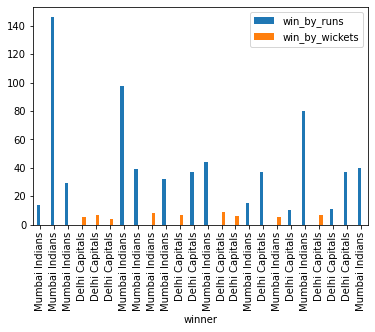

In [45]:
#Lets look at how each tean won the matches i.e weather batting first or bowling first
import matplotlib.pyplot as plt
df_DC_MI = df_DC_MI[['win_by_runs','win_by_wickets','winner']]
df_DC_MI.plot( "winner", kind="bar")

In [57]:
#Lets look at how many player of the match awards won by current DC and MI players.
#Note: I am taking top 8 palyers from both teams
#Sometimes team win dependent on Number of match winners in your team. i.e why i am using this approach.
#Note: I am taking these player names because these players are played atleast one match for their respective sides in this season till now.
df_man_of_match_DC = df_matches[(df_matches['player_of_match'] == 'AM Rahane') | (df_matches['player_of_match'] == 'S Dhawan') |
                                (df_matches['player_of_match'] == 'SS Iyer') | (df_matches['player_of_match'] == 'RR Pant') |
                                (df_matches['player_of_match'] == 'R Ashwin') | (df_matches['player_of_match'] == 'K Rabada') |
                                (df_matches['player_of_match'] == 'AR Patel') | (df_matches['player_of_match'] == 'MP Stoinis')]

print("Total number of man of matches won by present Delhi players is", df_man_of_match_DC.shape[0],"\n")                                 

df_man_of_match_MI = df_matches[(df_matches['player_of_match'] == 'AS Yadav') | (df_matches['player_of_match'] == 'Q de Kock') |
                                (df_matches['player_of_match'] == 'HH Pandya') | (df_matches['player_of_match'] == 'KA Pollard ') |
                                (df_matches['player_of_match'] == 'JJ Bumrah') | (df_matches['player_of_match'] == 'TA Boult') |
                                (df_matches['player_of_match'] == 'RD Chahar') | (df_matches['player_of_match'] == 'RG Sharma')]  

print("Total number of man of matches won by present Mumbai players is", df_man_of_match_MI.shape[0])                                                               

Total number of man of matches won by present Delhi players is 37 

Total number of man of matches won by present Mumbai players is 32


**Conclusion :-**

*   MI and DC played 24 matches against each othe. DC won 12 and MI won 12 matches.
*   DC won most of the matches when they are chasing and MI won most of the matches when they are defending targets.


So we can't choose any team by using above data, I am predicting DC will win today match because they are very good at chasing targets against MI, So in this year IPL last 22 matches 17 times team won while chasing targets and also their players won more man of the match awards.



### Q2) How many wickets will Kagiso Rabada take in the match?

In [46]:
#Filtering Rabada wickets. Run outs not counted in bowler wickets.
df_rabada = df_deliveries[(df_deliveries['bowler'] == 'K Rabada') & (df_deliveries['player_dismissed'] != 'No Wicket') &
                          (df_deliveries['dismissal_kind'] != 'run out')]

df_wickets = df_rabada.groupby('match_id',as_index=False)['player_dismissed'].count()
df_wickets.rename(columns={'player_dismissed':'number_of_wickets'},inplace=True)
df_wickets.head()

,match_id,number_of_wickets
0,24,1
1,31,2
2,41,2
3,44,1
4,11139,2


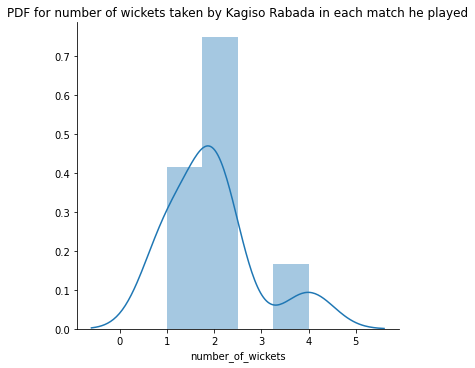

count    16.000000
mean      1.937500
std       0.928709
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       4.000000
Name: number_of_wickets, dtype: float64

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.FacetGrid(df_wickets,size=5) \
   .map(sns.distplot, "number_of_wickets") \
   .add_legend();

plt.title("PDF for number of wickets taken by Kagiso Rabada in each match he played")
plt.show();
df_wickets['number_of_wickets'].describe()

**Conclusion :-**



*   Probability is very high for wickets = 2 and median is also 2.
*   75% of the matches he took less than or equal to 2 wickets. So i am predicting he will take 2 wickets in today match.



### Q3) How many runs will be scored by Hardik Pandya?

In [48]:
df_pandya = df_deliveries[(df_deliveries['batsman'] == 'HH Pandya')]

#Calcaulting number of runs score by hardik in each match he played
df_runs_scored = df_pandya.groupby('match_id',as_index=False)['batsman_runs'].sum()

innings_played = df_pandya['match_id'].nunique()

print("number of innings hardik pandya played is : ",innings_played)
df_runs_scored.head()

number of innings hardik pandya played is :  61


,match_id,batsman_runs
0,2,35
1,7,29
2,10,2
3,12,9
4,16,6


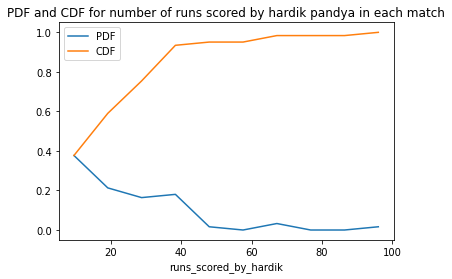

count    61.000000
mean     18.327869
std      17.253716
min       0.000000
25%       5.000000
50%      14.000000
75%      26.000000
max      96.000000
Name: batsman_runs, dtype: float64

In [49]:
#Now plotting PDF and CDF
import numpy as np
leg = ["PDF", "CDF"]
counts, bin_edges = np.histogram(df_runs_scored['batsman_runs'], bins=10,density = True)
pdf = counts/(np.sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.legend(leg)
plt.xlabel('runs_scored_by_hardik')
plt.title("PDF and CDF for number of runs scored by hardik pandya in each match")
plt.show();
df_runs_scored['batsman_runs'].describe()

**Conclusion :-**



*   From CDF plot i can say that in 60% of the matches he scored less than 20 runs and the probability is very between 0-10 runs.
*   So i am predicting he will score less than 10 runs in today match also.



### Q4) How many no-balls will be bowled in the match?

In [50]:
df_DCMI = df_deliveries[((df_deliveries['batting_team'] == 'Delhi Capitals') & (df_deliveries['bowling_team'] == 'Mumbai Indians')) |
                        ((df_deliveries['batting_team'] == 'Mumbai Indians') & (df_deliveries['bowling_team'] == 'Delhi Capitals')) ]

df_noballs = df_DCMI.groupby('match_id',as_index=False)['noball_runs'].sum()                        
df_noballs.head()                       

,match_id,noball_runs
0,24,1
1,44,0
2,82,2
3,109,1
4,150,2


In [51]:
df_noballs['noball_runs'].describe()

count    24.000000
mean      1.166667
std       0.963087
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: noball_runs, dtype: float64

**Conclusion :-**

According to above analysis i am predicting they will bowl 1 no-ball in the match.

### Q5) How many runs scored total by both teams?

In [52]:
df_total_runs = df_DCMI.groupby('match_id',as_index=False)['total_runs'].sum()
df_total_runs.head()

,match_id,total_runs
0,24,270
1,44,278
2,82,295
3,109,355
4,150,234


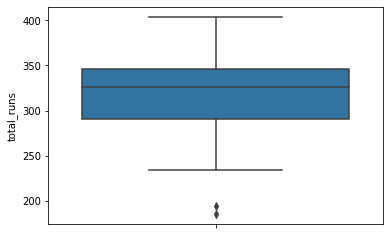

In [53]:
ax = sns.boxplot(y="total_runs", data=df_total_runs)

**Conclsion :-**


*   From above boxplot i can say 75% matches the total runs scored is less than 350 and median is 330.
*   So i am predicting in today match they will score total 320-350 runs.

